In [134]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [135]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [136]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier

In [ ]:
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 100.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "auto_class_weights": trial.suggest_categorical("auto_class_weights", [None, "Balanced", "SqrtBalanced"]),
        "verbose": 0,
        "random_seed": 42
    }

    model = CatBoostClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Accuracy: ", study.best_value)
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

In [138]:
model = CatBoostClassifier(
    iterations = 177,
    learning_rate = 0.07887136709181222,
    depth = 8,
    l2_leaf_reg = 16.385082592922004,
    border_count = 153,
    random_strength = 0.7984729711163192,
    bagging_temperature = 0.5079235147621743,
    auto_class_weights = None
)
model.fit(X_train, Y_train)

0:	learn: 0.9789549	total: 6.29ms	remaining: 1.11s
1:	learn: 0.8894618	total: 14.2ms	remaining: 1.25s
2:	learn: 0.8118725	total: 24.2ms	remaining: 1.4s
3:	learn: 0.7439870	total: 29.9ms	remaining: 1.29s
4:	learn: 0.6866920	total: 38.8ms	remaining: 1.33s
5:	learn: 0.6379584	total: 47ms	remaining: 1.34s
6:	learn: 0.5972273	total: 54.7ms	remaining: 1.33s
7:	learn: 0.5603604	total: 62.8ms	remaining: 1.33s
8:	learn: 0.5290980	total: 70.4ms	remaining: 1.31s
9:	learn: 0.4971185	total: 73.8ms	remaining: 1.23s
10:	learn: 0.4680770	total: 82ms	remaining: 1.24s
11:	learn: 0.4437084	total: 92.4ms	remaining: 1.27s
12:	learn: 0.4211696	total: 101ms	remaining: 1.27s
13:	learn: 0.4011990	total: 109ms	remaining: 1.26s
14:	learn: 0.3823779	total: 117ms	remaining: 1.26s
15:	learn: 0.3656516	total: 124ms	remaining: 1.25s
16:	learn: 0.3504268	total: 129ms	remaining: 1.21s
17:	learn: 0.3367387	total: 137ms	remaining: 1.21s
18:	learn: 0.3236801	total: 145ms	remaining: 1.21s
19:	learn: 0.3124335	total: 154ms	

In [139]:
res = model.predict(X_test)
print(res)
print(Y_test)

[[0]
 [1]
 [2]
 ...
 [2]
 [2]
 [2]]
       0
42222  0
29490  1
7168   2
35124  1
29931  2
...   ..
41573  2
22780  0
42708  2
28199  2
22171  2

[8819 rows x 1 columns]


In [140]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.9227803605851004
              precision    recall  f1-score   support

           0   0.791641  0.785272  0.788444      1616
           1   0.793821  0.800000  0.796898      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922780      8819
   macro avg   0.861820  0.861757  0.861781      8819
weighted avg   0.922777  0.922780  0.922774      8819



PermutationExplainer explainer: 8820it [17:06,  8.49it/s]                          
C:\Users\eddie\AppData\Local\Temp\ipykernel_34304\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


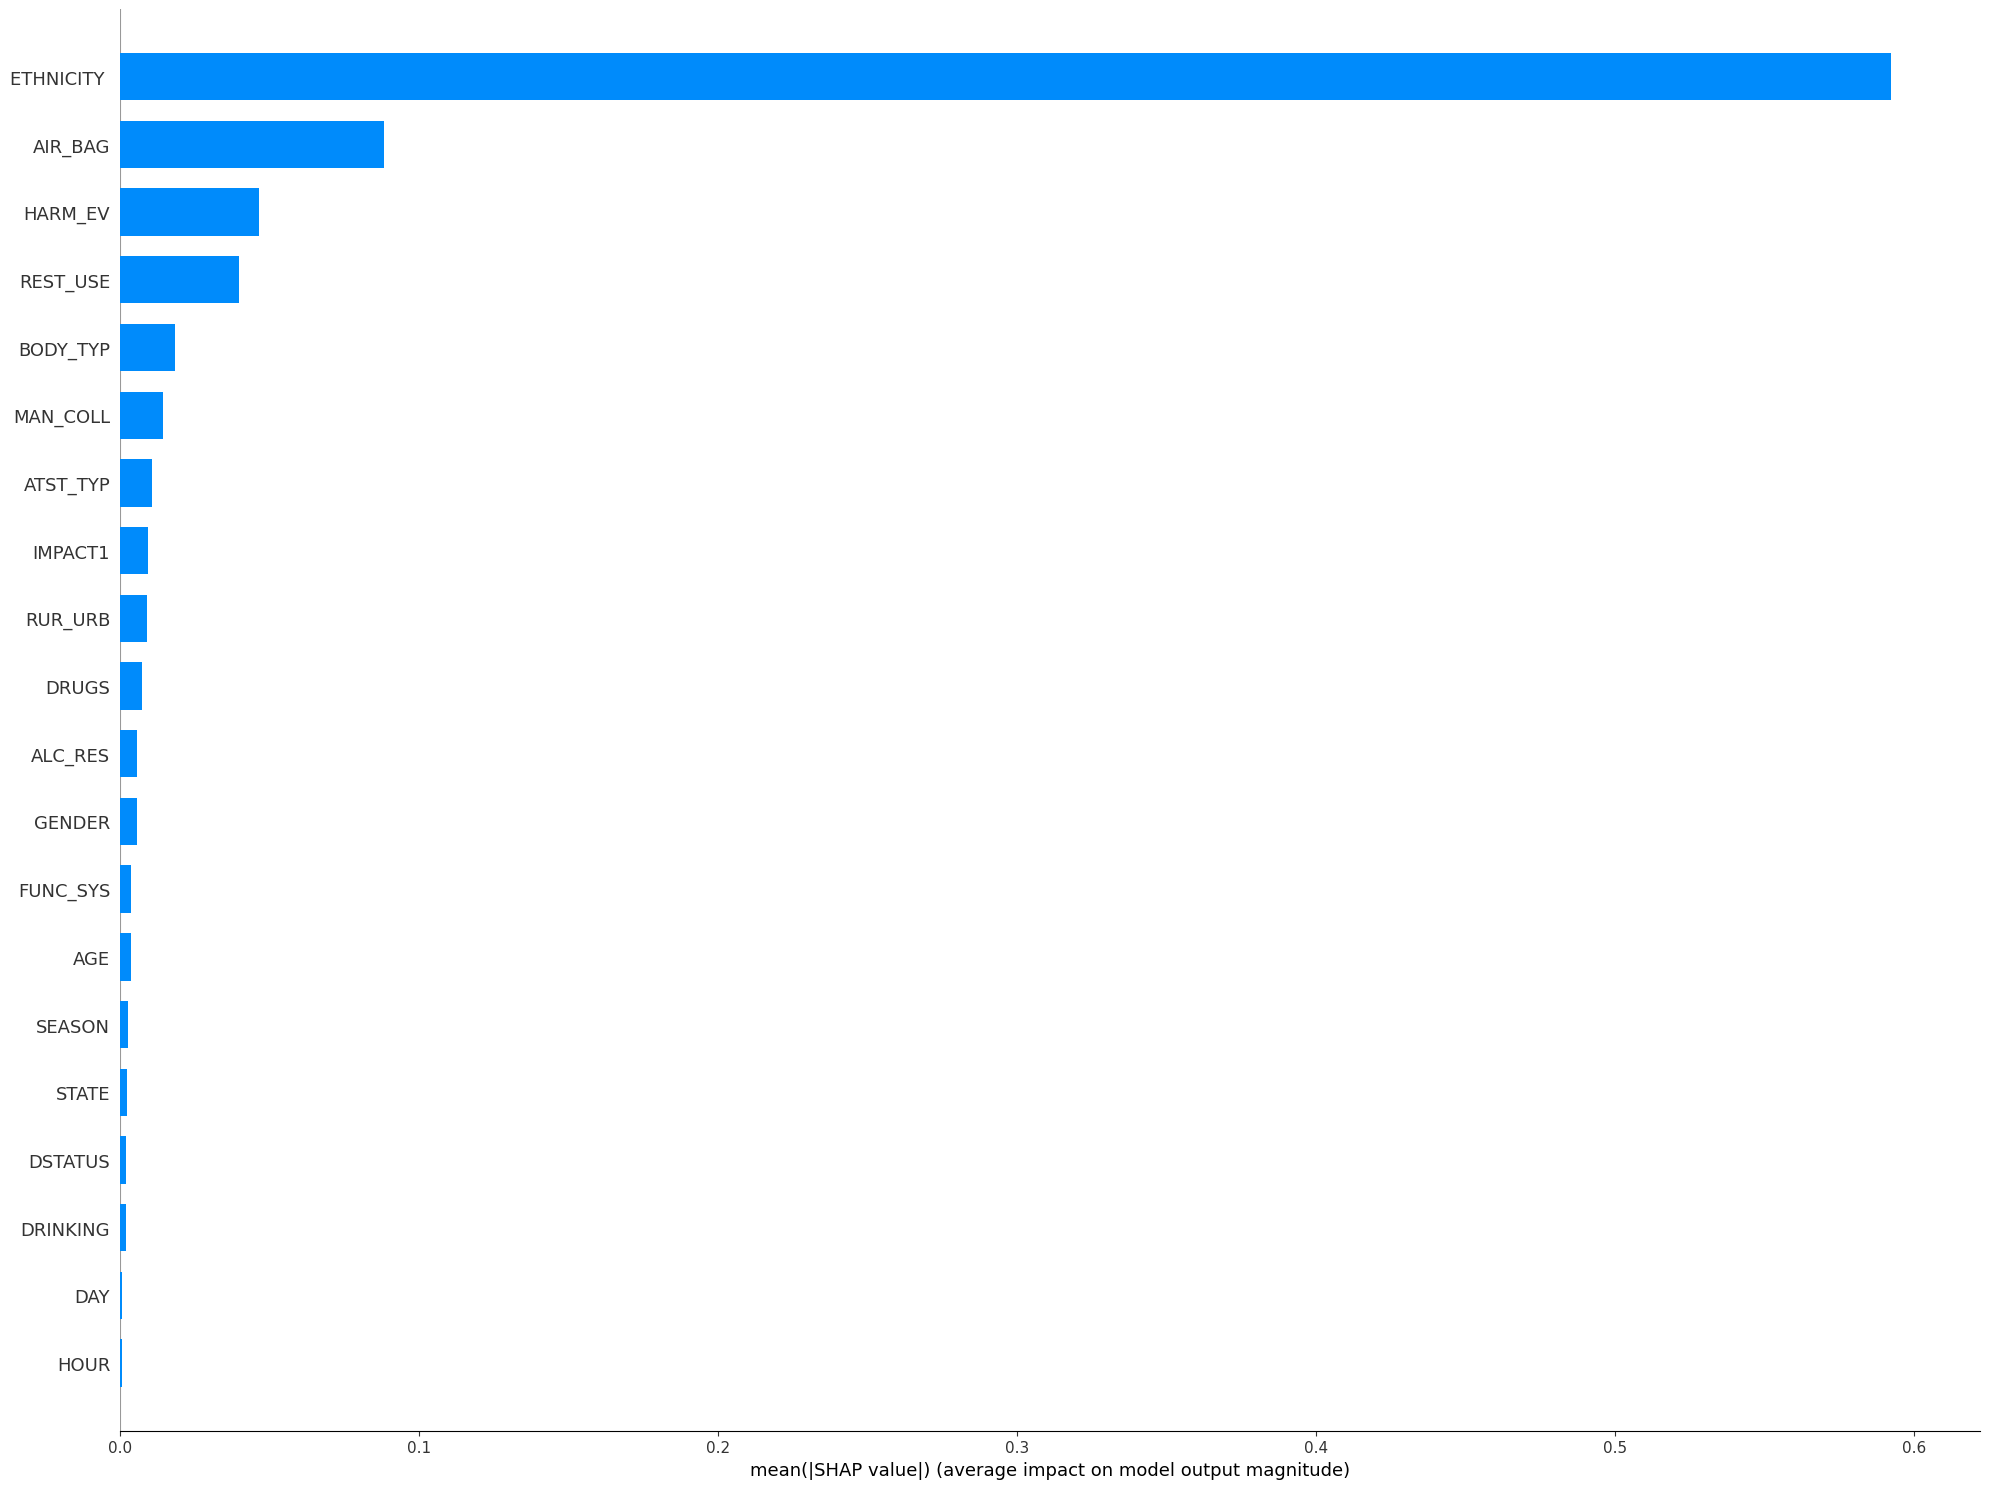

In [141]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

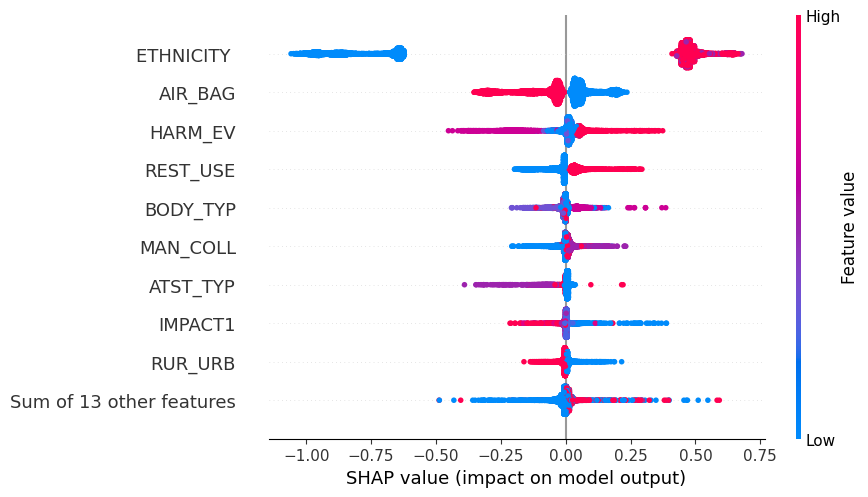

In [142]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

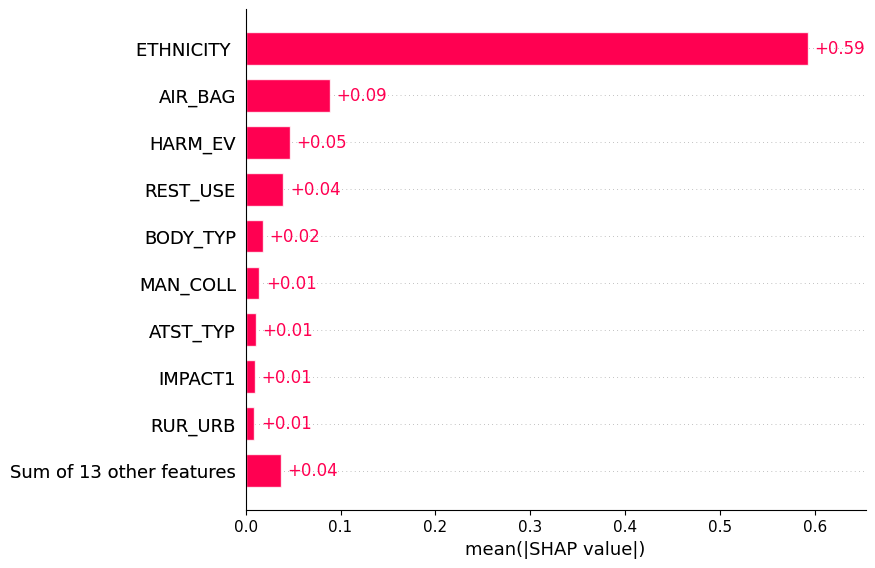

In [143]:
shap.plots.bar(explanation)

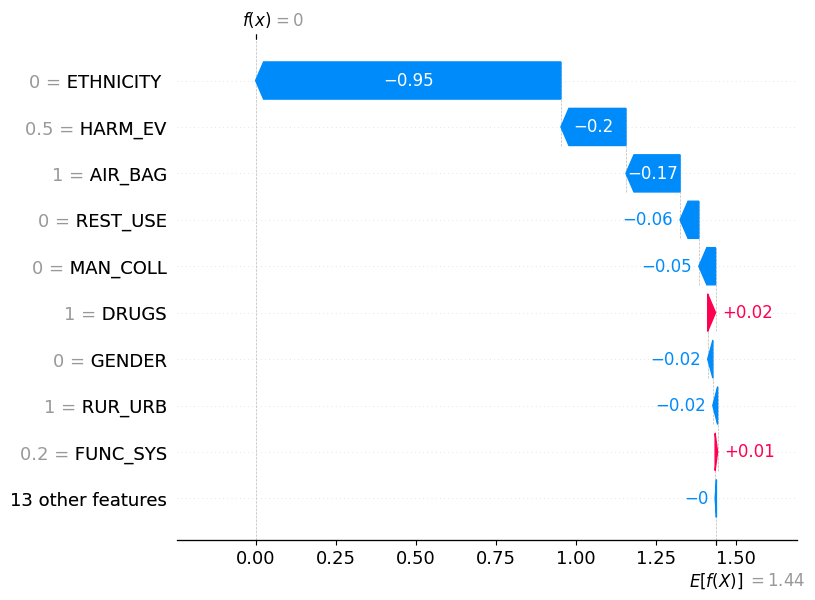

In [144]:
shap.plots.waterfall(explanation[0])

In [145]:
print(type(features))
# features = features.to_list()
print(features)
# print(type(features))

<class 'pandas.core.indexes.base.Index'>
Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [146]:
print(shap_values[0].shape)

(22,)


In [152]:
# explainer = shap.Explainer(model.predict,X_test)
# shap_values = explainer(X_test)

shap.plots.force(shap_values[0],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'])

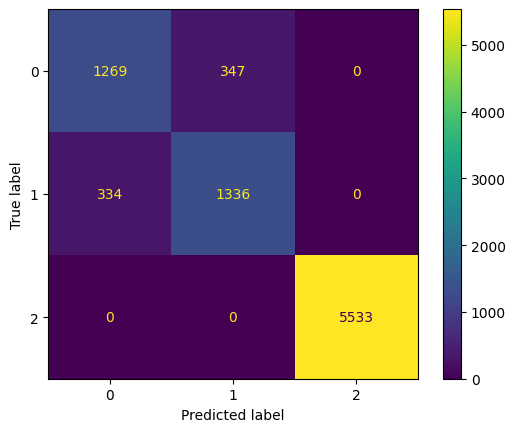

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()